In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Loading the dataset

In [77]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Model class and activation function

In [78]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

class LogisticRegression:
    def __init__(self, lr, n_iter):
        self.lr = lr
        self.n_iter = n_iter
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        m , n = X.shape
        self.w = np.zeros((n , 1))
        self.b = 0
        y = y.values.reshape(-1, 1)
        
        for _ in range(self.n_iter):
            linear_pred = np.dot(X, self.w) + self.b
            y_pred = sigmoid(linear_pred)

            # loss function: Binary Cross-Entropy
            loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            self.losses.append(loss)

            # gradient calculations
            dw = np.dot(X.T , (y_pred - y)) / m
            db = np.mean(y_pred - y)

            # parameters update
            self.w -= self.lr * dw
            self.b -= self.lr * db
            

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        pred = sigmoid(z)
        y_pred = (pred > 0.5).astype(int).flatten()
        return y_pred

# utility functions

In [79]:
def train_test_split(X, y, ratio, shuffle = False, seed = None):
    if seed is not None:
        np.random.seed(seed)
    if shuffle:
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X = X.iloc[indices].reset_index(drop=True)
        y = y.iloc[indices].reset_index(drop=True)
    else:
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)
    
    divider = int(len(X) * ratio)
    train_X = X.iloc[: divider]
    test_X = X.iloc[divider: ]
    train_y = y.iloc[: divider]
    test_y = y.iloc[divider: ]
    return train_X, train_y, test_X, test_y

def accuracy(y_true, y_pred):
        return np.mean(y_true == y_pred)

def standardize_train_test(train_X, test_X):
    mean = train_X.mean(axis=0)
    std = train_X.std(axis=0)
    train_X_scaled = (train_X - mean) / std
    test_X_scaled = (test_X - mean) / std
    return train_X_scaled, test_X_scaled


# Model execution

In [80]:
train_X, train_y, test_X, test_y = train_test_split(X, y, ratio  = 0.7, shuffle = True)
train_X, test_X = standardize_train_test(train_X, test_X)

In [81]:
model = LogisticRegression( lr = 0.01 , n_iter = 1000)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

In [82]:
f'MODEL ACCURACY : {accuracy(test_y, y_pred)}'

'MODEL ACCURACY : 0.9883040935672515'

# loss plot

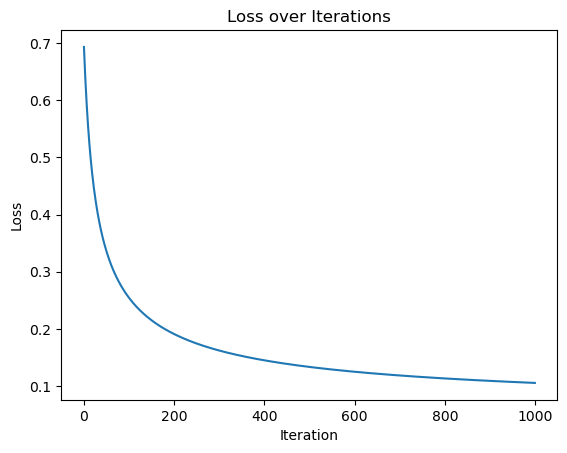

In [83]:
fig, ax = plt.subplots()
ax.plot(model.losses)
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# feature importance

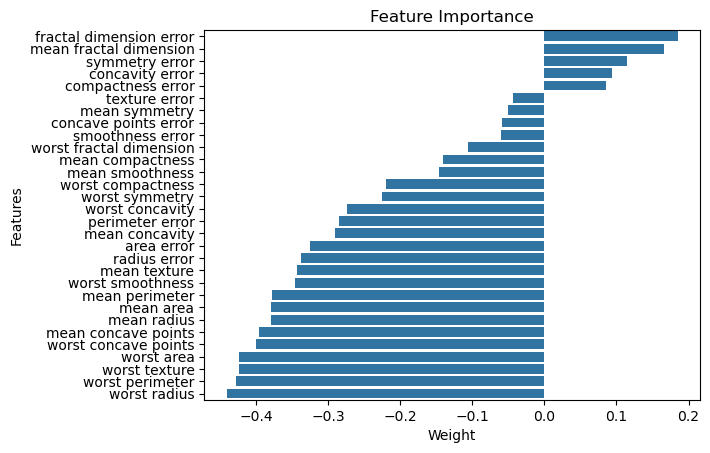

In [84]:
features = pd.Series(model.w.flatten(), index = train_X.columns).sort_values(ascending = False)
fig, ax = plt.subplots()
sns.barplot(ax = ax,y = features.index, x = features.values)
ax.set_title("Feature Importance")
ax.set_xlabel("Weight")
ax.set_ylabel("Features")
plt.show()